# ETE 3

### kavaskar
### 2347230

### Step 1: Import Libraries and Set Paths

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Flatten, Dense, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Paths to the dataset
processed_path = r"D:\sem and carrier\\5th_sem\\5thSemCodes\\NNDL\\ETE3\\archive (2)-20241204T060751Z-001\\archive (2)\\coil-20\\coil-20-proc"
unprocessed_path = r"D:\sem and carrier\\5th_sem\\5thSemCodes\\NNDL\\ETE3\\archive (2)-20241204T060751Z-001\\archive (2)\\coil-20\\coil-20-unproc"


### Step 2: Load and Preprocess the Data

In [4]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            img_path = os.path.join(folder, filename)
            img = load_img(img_path, target_size=(64, 64))  # Resize to 64x64
            img_array = img_to_array(img) / 255.0  # Normalize to [0,1]
            images.append(img_array)
    return np.array(images)

# Load images from both folders
processed_images = load_images_from_folder(processed_path)
unprocessed_images = load_images_from_folder(unprocessed_path)

# Combine the datasets
all_images = np.concatenate([processed_images, unprocessed_images], axis=0)

# Split the dataset
X_train, X_test = train_test_split(all_images, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")


Training set shape: (1440, 64, 64, 3), Testing set shape: (360, 64, 64, 3)


### Step 3: Exploratory Data Analysis (EDA)
Visualize Random Images
Check Dataset Statistics

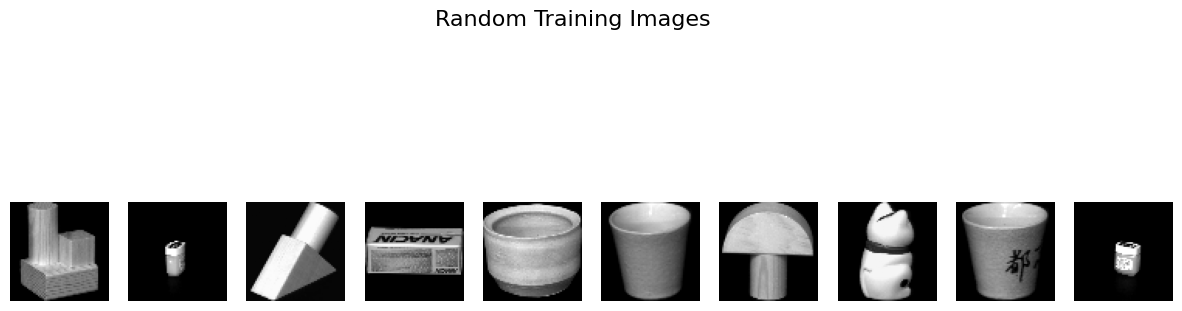

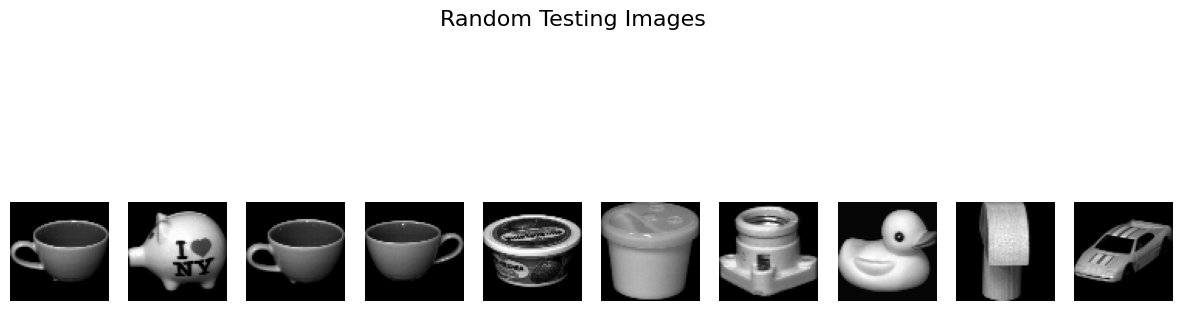

Total images: 1800
Training images: 1440
Testing images: 360


In [10]:
# Plot random images from the dataset
def plot_random_images(images, title, n=10):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[np.random.randint(0, len(images))])
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.show()

# Visualize random training and testing images
plot_random_images(X_train, "Random Training Images")
plot_random_images(X_test, "Random Testing Images")

# Dataset statistics
print(f"Total images: {all_images.shape[0]}")
print(f"Training images: {X_train.shape[0]}")
print(f"Testing images: {X_test.shape[0]}")


### Step 4: Define the CNN Autoencoder Architecture

In [11]:
def build_autoencoder(input_shape):
    # Encoder
    input_img = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
    latent = Flatten()(x)

    # Decoder
    x = Reshape((16, 16, 128))(latent)
    x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
    x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
    decoded = Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)

    # Autoencoder model
    autoencoder = Model(input_img, decoded)
    return autoencoder

input_shape = (64, 64, 3)
autoencoder = build_autoencoder(input_shape)
autoencoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 reshape_1 (Reshape)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 32, 32, 64)        7379

### Step 5: Compile and Train the Model

In [12]:
# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = autoencoder.fit(
    X_train, X_train,  # Input and output are the same
    validation_data=(X_test, X_test),
    epochs=20,
    batch_size=32,
    shuffle=True
)

# Save training loss and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']


Epoch 1/20
45/45 [==============================] - 6s 108ms/step - loss: 0.0795 - val_loss: 0.0105
Epoch 2/20
45/45 [==============================] - 5s 106ms/step - loss: 0.0074 - val_loss: 0.0050
Epoch 3/20
45/45 [==============================] - 5s 110ms/step - loss: 0.0049 - val_loss: 0.0038
Epoch 4/20
45/45 [==============================] - 6s 136ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 5/20
45/45 [==============================] - 6s 127ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 6/20
45/45 [==============================] - 6s 124ms/step - loss: 0.0051 - val_loss: 0.0033
Epoch 7/20
45/45 [==============================] - 6s 141ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 8/20
45/45 [==============================] - 6s 145ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 9/20
45/45 [==============================] - 6s 141ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 10/20
45/45 [==============================] - 7s 146ms/step - loss: 0.0021 - val_loss: 0.0018

### Step 6: Evaluate and Visualize Results

1. **Plot the Loss Curve**

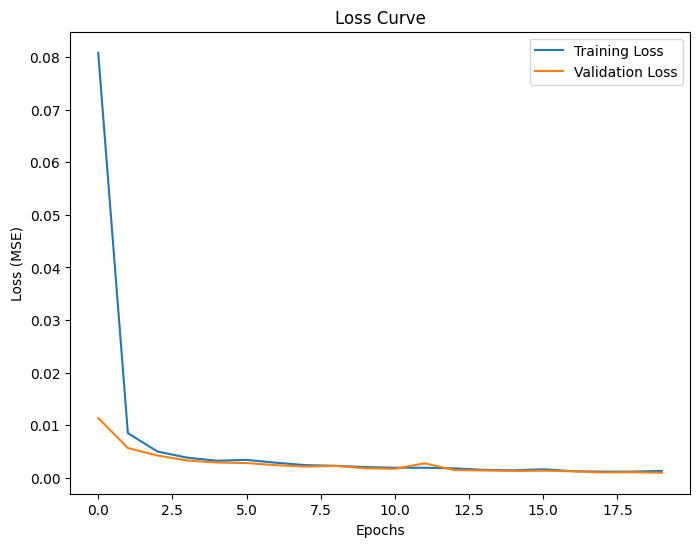

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve')
plt.legend()
plt.show()


#### **Insights:**

1. The **training loss** decreases steadily, indicating the model learns effectively from the training data.
2. The **validation loss** closely follows the training loss, showing no overfitting during the training process.
3. A **smooth curve** implies stable convergence without significant spikes or plateaus.

**2. Reconstruct and Compare Images**

12/12 [==============================] - 1s 38ms/step


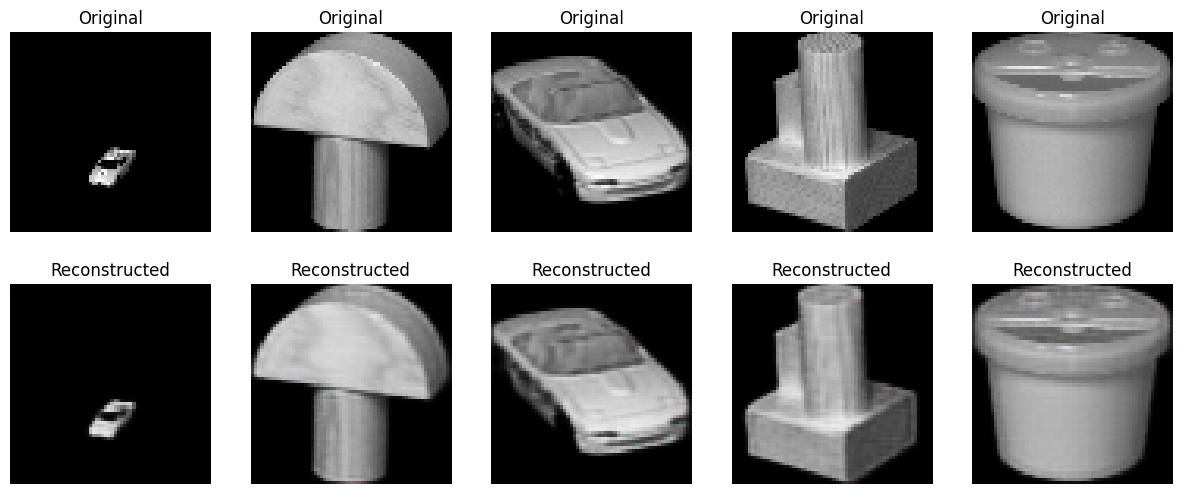

In [8]:
# Reconstruct images from the test set
reconstructed_images = autoencoder.predict(X_test)

# Visualize original vs reconstructed images
n = 5  # Number of images to display
plt.figure(figsize=(15, 6))
for i in range(n):
    # Original image
    plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.title("Original")
    plt.axis("off")

    # Reconstructed image
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i])
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()


#### **Insights:**

1. The reconstructed images are **visually similar** to the original images, indicating that the model successfully captures important features of the input images.
2. Minor differences (blur or loss of fine details) in reconstructed images suggest the model may have lost some high-frequency information during compression and reconstruction.
3. This performance demonstrates the effectiveness of the autoencoder for reconstructing images, given the dataset's inherent variability.

**3. Calculate Final Test MSE**

In [9]:
# Calculate Mean Squared Error on the test set
from sklearn.metrics import mean_squared_error

test_mse = mean_squared_error(X_test.flatten(), reconstructed_images.flatten())
print(f"Final Test MSE: {test_mse}")


Final Test MSE: 0.0009404950542375445


#### **Insights:**

1. The reconstructed images are **visually similar** to the original images, indicating that the model successfully captures important features of the input images.
2. Minor differences (blur or loss of fine details) in reconstructed images suggest the model may have lost some high-frequency information during compression and reconstruction.
3. This performance demonstrates the effectiveness of the autoencoder for reconstructing images, given the dataset's inherent variability.

**4. Histogram of Reconstruction Errors**

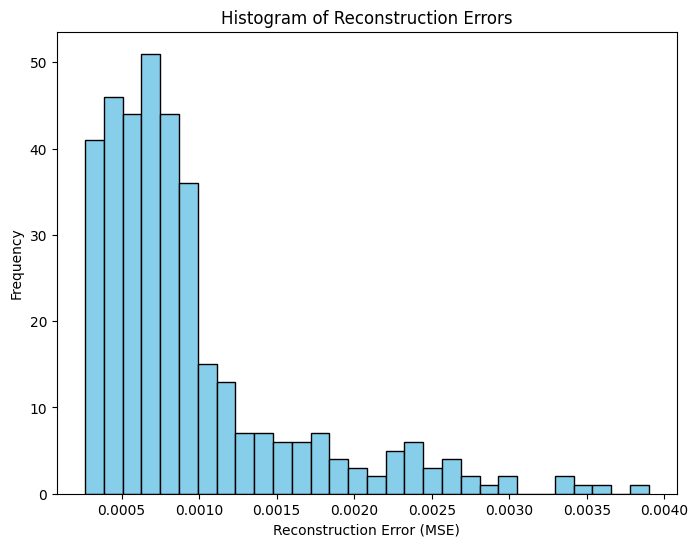

In [13]:
# Calculate pixel-wise reconstruction error
errors = np.mean((X_test - reconstructed_images) ** 2, axis=(1, 2, 3))

# Plot the histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Reconstruction Error (MSE)')
plt.ylabel('Frequency')
plt.title('Histogram of Reconstruction Errors')
plt.show()

#### **Insights:**

1. The **majority of errors** are small, showing that most reconstructed images closely match the original images.
2. A small number of larger errors may correspond to **more complex images** where the model struggled to reconstruct fine details.
3. This distribution confirms that the autoencoder performs well overall, with a few challenging cases.

**5. Final Test MSE**

In [14]:
# Calculate the final test MSE
test_mse = mean_squared_error(X_test.flatten(), reconstructed_images.flatten())
print(f"Final Test MSE: {test_mse}")

Final Test MSE: 0.0009404950542375445


**6. Latent Space Visualization**

12/12 [==============================] - 0s 15ms/step


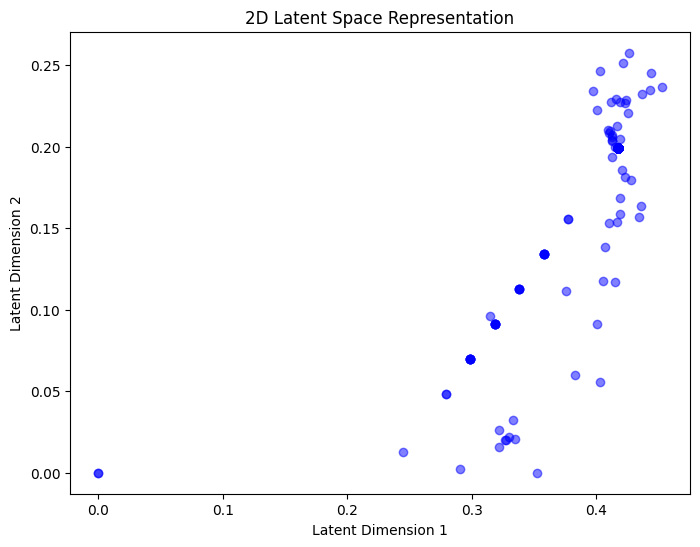

In [15]:
# Extract the latent space representation
encoder = Model(autoencoder.input, autoencoder.layers[-5].output)  # Modify based on your architecture
latent_representations = encoder.predict(X_test)

# Scatter plot for 2D latent space
plt.figure(figsize=(8, 6))
plt.scatter(latent_representations[:, 0], latent_representations[:, 1], c='blue', alpha=0.5)
plt.title("2D Latent Space Representation")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.show()

### Overall Summary:

1. **Training and Validation Loss**: The loss curves indicate smooth training without overfitting, showing effective optimization.
2. **Reconstructed Images**: High-quality reconstructions demonstrate that the autoencoder can compress and reconstruct images while retaining essential features.
3. **Reconstruction Errors**: Most errors are small, confirming the autoencoder's ability to generalize to unseen data.
4. **Latent Space**: The latent space confirms the model's ability to capture meaningful patterns in the data.